## **Histogram Inspector and Inspection Log**

### **Attempt 1:**
This group of histograms have been saved to `xtc_talk_analysis/histograms_with_fixed_range`.

Observed that some combination of channels with high cross talk values have really few events. (`j1 = 10, j2 = 5`). But then found that basically this happens for all `j1 = 10`. Need to rerun without fixed range to see if this is always the case.

Edit: No. High cross talk values do not always lead to low event counts. (`j1 = 8, j1 = 14`)

Observed that even for channel combination with extremely high cross talk values may have beautiful Gaussian peaks (I worried something like plateau distribution). 


### **Attempt 2:**
This time the histogram fitting and drawing is going to be separated. The fitting result is stored in ```fit_results``` while the drawing (to be removed in future version) is stored in ```fit_figures```. The purpose of the next block is to display the fitted histograms.

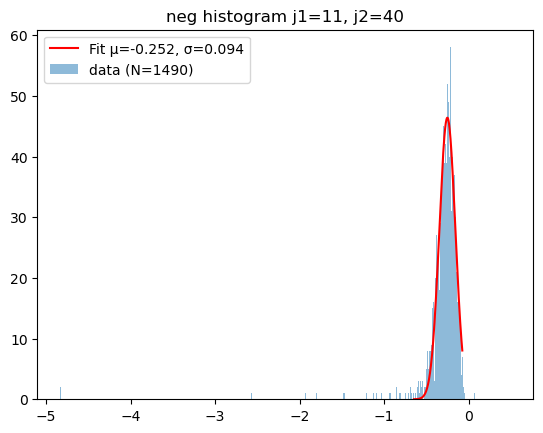

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

j1 = 11
j2 = 40
label = "neg"

base_dir = os.getcwd() 
fit_dir = os.path.join(base_dir, "../fit_results")
fit_npz_path = os.path.join(fit_dir, f"fit_{label}_{j1}_{j2}.npz")
histo_dir = os.path.join(base_dir, "../histograms")
histo_npz_path = os.path.join(histo_dir, f"xtalk_{j1}_{j2}.npz")


with np.load(histo_npz_path) as data:
    neg_counts = data["neg_counts"]
    neg_bins = data["neg_bins"]
    pos_counts = data["pos_counts"]
    pos_bins = data["pos_bins"]
#print(neg_counts)
#print(neg_bins)

with np.load(fit_npz_path) as data:
    success = bool(data["success"])
    reason = data["reason"]
    if success:
        A = float(data["A"])
    mu = float(data["mu"])
    sigma = float(data["sigma"])
    total_events = int(data["total_events"])

if label == "neg":
    x = 0.5 * (neg_bins[1:] + neg_bins[:-1])
    y = neg_counts
    bins = neg_bins
elif label == "pos":
    x = 0.5 * (pos_bins[1:] + pos_bins[:-1])
    y = pos_counts
    bins = pos_bins
else:
    raise ValueError("Incorrect label")
    
mask = y > 0.05 * np.max(y)
x_fit = x[mask]

if not success:
    print(f"No plot due to {reason}")
    plt.figure()
    plt.bar(x, y, width=np.diff(bins), alpha=0.5, label=f"data (N={total_events})")
    plt.title(f"{label} histogram j1={j1}, j2={j2}")
    plt.legend()
    plt.show()
    sys.exit(0)

plt.figure()
plt.bar(x, y, width=np.diff(bins), alpha=0.5, label=f"data (N={total_events})")
x_dense = np.linspace(min(x_fit), max(x_fit), 300)
plt.plot(
    x_dense,
    gaussian(x_dense, A, mu, sigma),
    'r-',
    label=f"Fit μ={mu:.3f}, σ={sigma:.3f}"
)
plt.title(f"{label} histogram j1={j1}, j2={j2}")
plt.legend()
plt.show()